## chainer SSIM

In [0]:
import chainer 
import chainer.functions as F
import numpy as np
from math import exp
import cv2
import matplotlib.pyplot as plt

In [0]:
def gaussian(window_size, sigma, xp):
    gauss = chainer.Variable(xp.array([exp(-(x - window_size//2)**2/float(2*sigma**2)) for x in range(window_size)], dtype=xp.float32))
    # print(gauss)
    return gauss/F.sum(gauss)

In [0]:
def create_window(window_size, channel, xp):
    _1D_window = F.reshape(gaussian(window_size, 1.5, xp), (-1, 1))

    _2D_window = F.reshape(F.tensordot(_1D_window, _1D_window.transpose(), axes=1), (1, 1, -1, window_size))
    window = F.repeat(_2D_window, channel, axis=0)

    return window

In [0]:
def _ssim(img1, img2, window, window_size, channel, size_average=True):
    mu1 = F.convolution_2d(img1, window, pad=window_size//2, groups=channel)
    mu2 = F.convolution_2d(img2, window, pad=window_size//2, groups=channel)

    mu1_sq = F.square(mu1)
    mu2_sq = F.square(mu2)
    mu1_mu2 = mu1 * mu2

    sigma1_sq = F.convolution_2d(img1*img1, window, pad=window_size//2, groups=channel) - mu1_sq
    sigma2_sq = F.convolution_2d(img2*img2, window, pad=window_size//2, groups=channel) - mu2_sq
    sigma12 = F.convolution_2d(img1*img2, window, pad=window_size//2, groups=channel) - mu1_mu2

    C1 = 0.01**2
    C2 = 0.03**2

    ssim_map = ((2*mu1_mu2 + C1)*(2*sigma12 + C2))/((mu1_sq + mu2_sq + C1)*(sigma1_sq + sigma2_sq + C2))
    if size_average:
        return F.mean(ssim_map)
    return NotImplementedError()

In [0]:
def ssim(img1, img2, window_size = 11, size_average = True):
    (_, channel, _, _) = img1.shape
    xp = chainer.backends.cuda.get_array_module(img1)
    window = create_window(window_size, channel, xp)
    
    return _ssim(img1, img2, window, window_size, channel, size_average)

### Read image

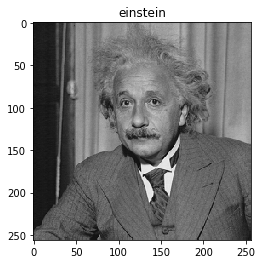

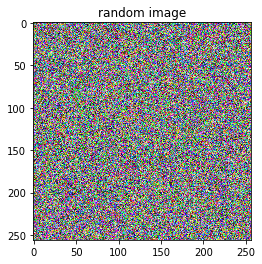

In [6]:
npImg1 = cv2.imread("einstein.png")
plt.imshow(npImg1)
plt.title("einstein")
plt.show()
img1 = (np.rollaxis(npImg1, 2)[None,...]/255.0).astype(np.float32)
img2 = np.random.rand(img1.shape[0], img1.shape[1], img1.shape[2], img1.shape[3]).astype(np.float32)
plt.imshow(np.squeeze(img2, axis=0).transpose(1,2,0))
plt.title("random image")
plt.show()

In [10]:
ssim_value = ssim(img1, img2)
ssim_value = chainer.backends.cuda.to_cpu(ssim_value.array)
print("Initial ssim:", ssim_value)

Initial ssim: 0.02439237


### Generate EINSTEIN from random image

In [0]:
class SsimLoss(chainer.Chain):
    def __init__(self, img, window_size = 11, size_average = True):
        super(SsimLoss, self).__init__()
        self.window_size = window_size
        self.size_average = size_average
        self.channel = 1
        # self.window = create_window(window_size, self.channel)
        with self.init_scope():
            self.img = chainer.Parameter(initializer=img)
        # print(self.img.shape)
    def __call__(self, img1):
        (_, channel, _, _) = img1.shape
        xp = img1.xp

        window = create_window(self.window_size, channel, xp)
        
        self.window = window
        self.channel = channel

        return _ssim(img1, self.img, window, self.window_size, channel, self.size_average)

### Optimize random image using ssim loss

In [0]:
ssim_loss = SsimLoss(img=img2)
ssim_loss.to_gpu()
optimizer = chainer.optimizers.Adam()
optimizer.setup(ssim_loss)
xp = ssim_loss.xp
img1 = chainer.Variable(xp.array(img1, dtype=xp.float32))

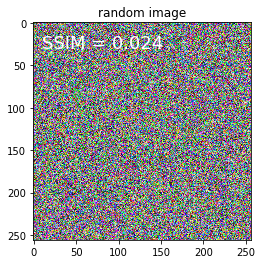

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


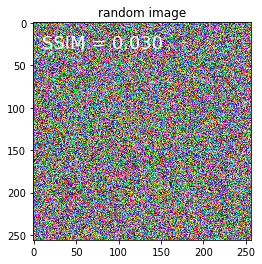

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


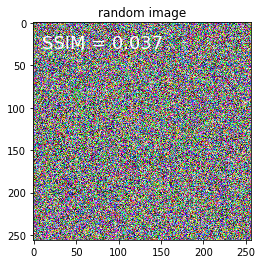

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


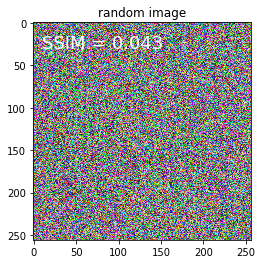

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


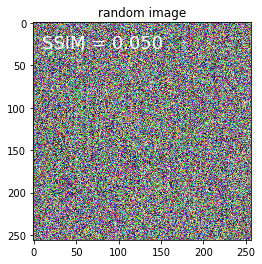

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


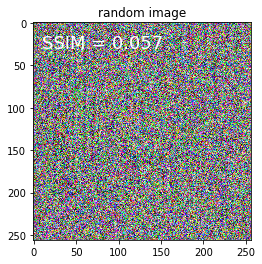

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


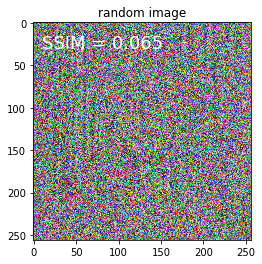

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


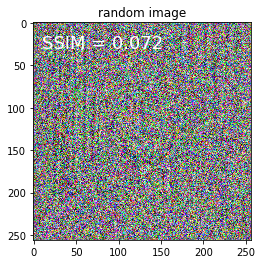

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


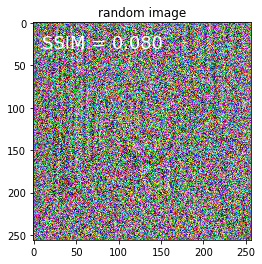

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


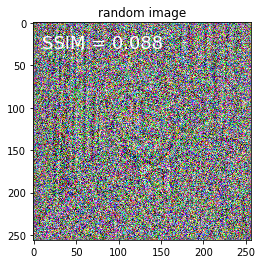

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


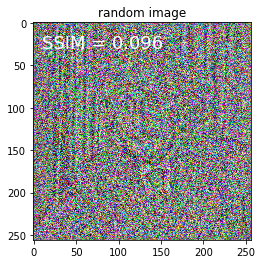

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


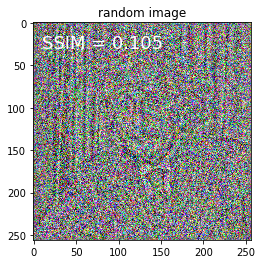

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


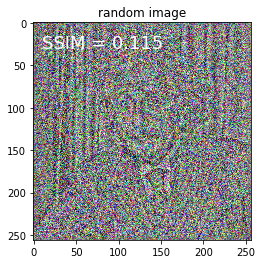

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


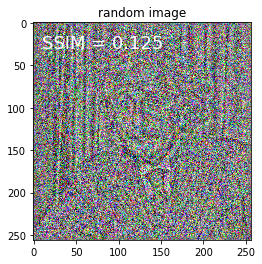

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


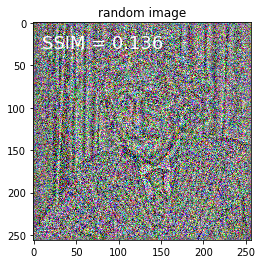

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


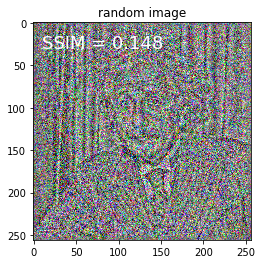

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


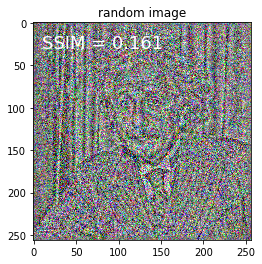

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


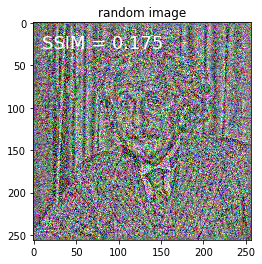

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


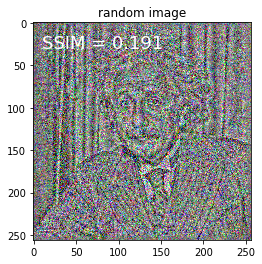

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


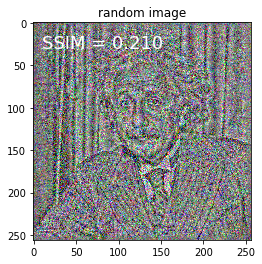

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


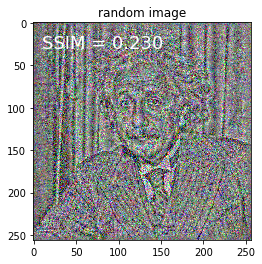

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


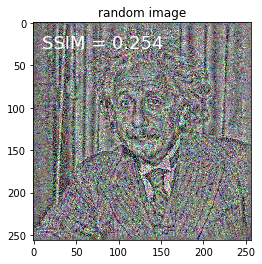

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


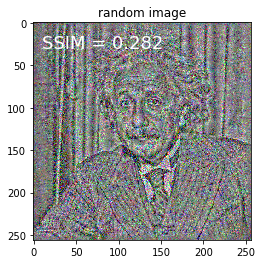

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


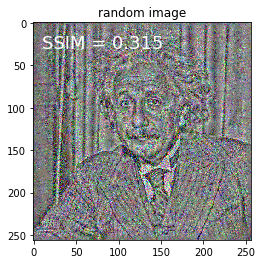

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


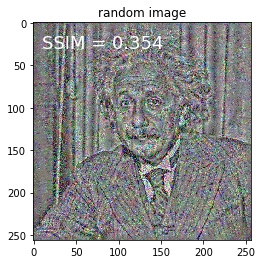

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


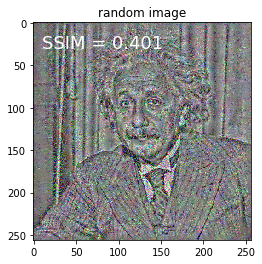

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


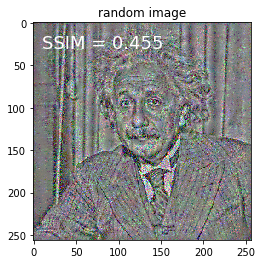

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


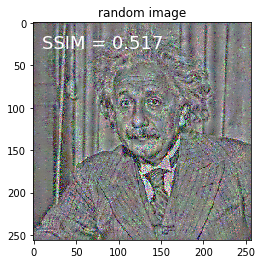

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


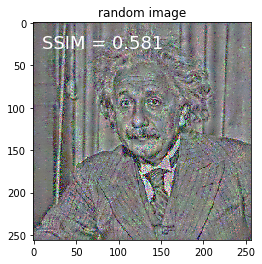

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


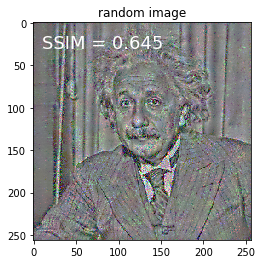

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


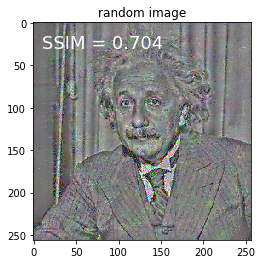

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


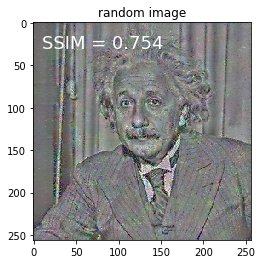

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


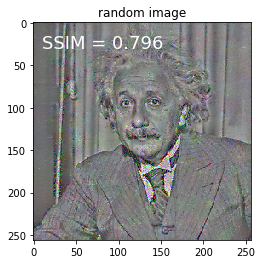

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


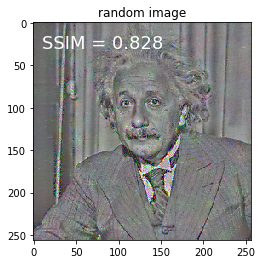

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


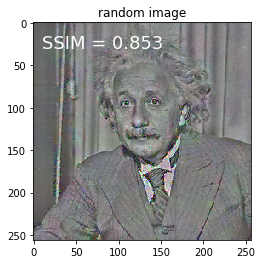

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


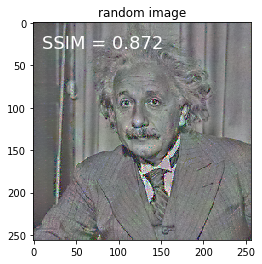

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


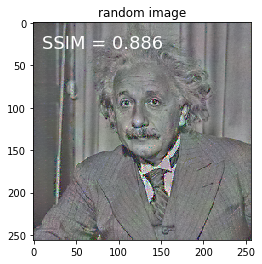

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


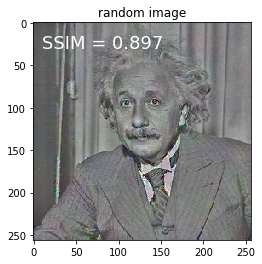

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


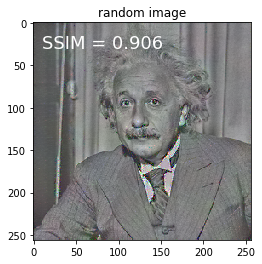

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


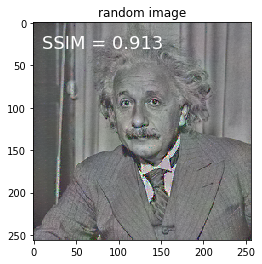

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


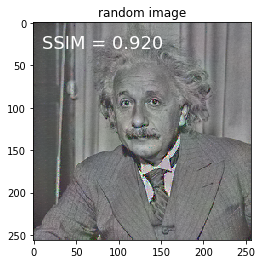

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


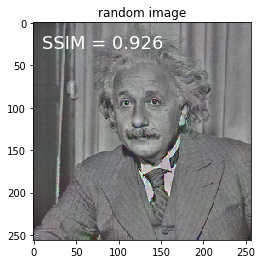

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


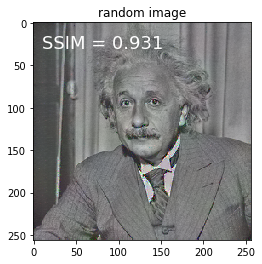

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


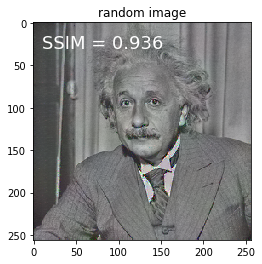

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


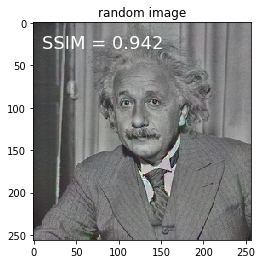

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


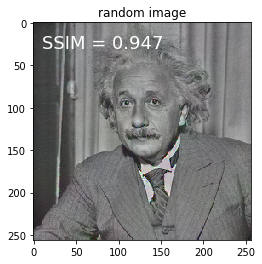

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


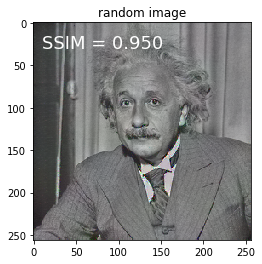

In [14]:
iter = 0
plt.figure()
plt.imshow(chainer.backends.cuda.to_cpu(F.squeeze(ssim_loss.img, axis=0).data).transpose(1,2,0))
plt.text(10, 30, 'SSIM = {:.3f}'.format(ssim_value), fontsize=18, color="white")
plt.title("random image")
plt.show()

while ssim_value < 0.95:
    ssim_out = -ssim_loss(img1)
    optimizer.target.cleargrads()
    ssim_out.backward()
    optimizer.update()
    ssim_value = - chainer.backends.cuda.to_cpu(ssim_out.array)
    iter += 1
    if iter % 10 == 0:
        plt.figure()
        plt.imshow(chainer.backends.cuda.to_cpu(F.squeeze(ssim_loss.img, axis=0).data).transpose(1,2,0))
        plt.text(10, 30, 'SSIM = {:.3f}'.format(ssim_value), fontsize=18, color="white")
        plt.title("random image")
        plt.show()
    # print(ssim_value)

plt.figure()
plt.imshow(chainer.backends.cuda.to_cpu(F.squeeze(ssim_loss.img, axis=0).data).transpose(1,2,0))
plt.text(10, 30, 'SSIM = {:.3f}'.format(ssim_value), fontsize=18, color="white")
plt.title("random image")
plt.show()